In [1]:
import torch
import torch.nn as nn
import math

### Input Embedding Layer

In [2]:
class InputEmbeddings(nn.Module):

    def __init__(self, d_model: int, vocab_size: int):
        super().__init__()
        self.d_model = d_model
        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size, d_model)

    def forward(self, x):
        return self.embedding(x) * math.sqrt(self.d_model)


In [3]:
# Example I have a cat
# Vocabulary and tokens
vocab = {"I":0, "have":1, "a":2, "cat":3}
sentence = ["I", "have", "a", "cat"]
token_id = [vocab[word] for word in sentence]

d_model = 512
vocab_size = len(vocab)

embedding_layer = InputEmbeddings(d_model=d_model, vocab_size=vocab_size)

X = torch.tensor(token_id)

input_embedding = embedding_layer(X)

In [4]:
input_embedding

tensor([[ 14.5997, -11.9980,  -0.1503,  ...,  -7.5632,   5.3456,   6.2047],
        [  4.3818,   0.5142,  16.7501,  ...,  18.6452,  46.1746, -32.1511],
        [-12.4189,  15.9514, -13.7177,  ..., -24.2333,   4.5007, -19.5402],
        [ -5.2059,   6.3483,  19.3131,  ..., -13.3938,  23.7209,   4.9807]],
       grad_fn=<MulBackward0>)

### Positional Encoding

In [5]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, seq_len: int, dropout: float):
        super().__init__()
        self.d_model = d_model
        self.seq_len = seq_len
        self.dropout = nn.Dropout(dropout)
    
        # create matirx of shape(seq_len, d_model)
        pe = torch.zeros(seq_len, d_model)
        position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model,2).float() * (-math.log(10000.0)/d_model))

        # apply sin to even and cos to odd position
        pe[:,0::2] = torch.sin(position*div_term)
        pe[:,1::2] = torch.cos(position*div_term)

        pe = pe.unsqueeze(0)

        self.register_buffer('pe',pe)

    def forward(self, x):
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        return self.dropout(x)
        

In [6]:
ie_batch = input_embedding.unsqueeze(0) #size torch.Size([1, 4, 512])
pos_enc = PositionalEncoding(512, 4, .1)
pos_enc(ie_batch)

tensor([[[ 16.2219, -12.2200,  -0.1669,  ...,  -7.2925,   5.9396,   8.0052],
         [  5.8036,   1.1716,  19.5244,  ...,   0.0000,  51.3052, -34.6124],
         [-12.7885,  17.2614, -14.2015,  ..., -25.8147,   5.0010, -20.6002],
         [ -5.6275,   5.9537,  21.7313,  ..., -13.7709,  26.3569,   6.6452]]],
       grad_fn=<MulBackward0>)

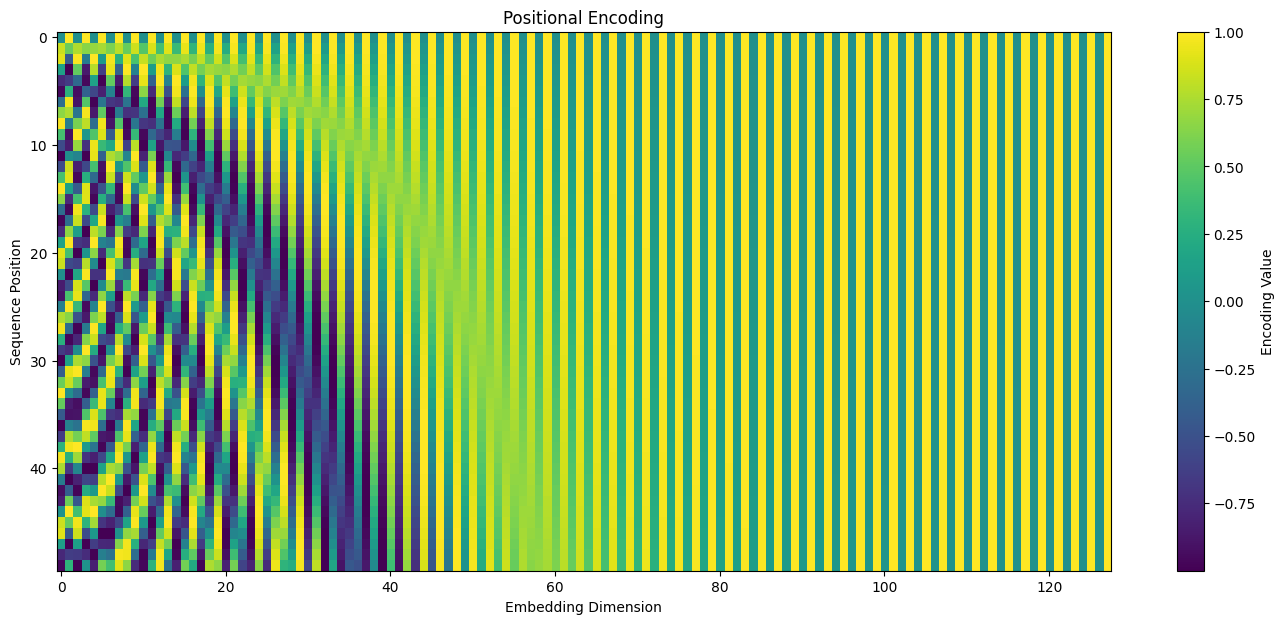

In [21]:
import matplotlib.pyplot as plt

# Positional Encoding Visualization
#pe_matrix = pos_enc.pe.squeeze(0).numpy()  # Shape: (seq_len, d_model)

pe = PositionalEncoding(d_model=128, seq_len=50, dropout=0.1)
pe_matrix = pe.pe.squeeze(0).numpy()  # Shape: (seq_len, d_model)

plt.figure(figsize=(17, 7))
plt.imshow(pe_matrix, cmap="viridis", aspect="auto")
plt.colorbar(label="Encoding Value")
plt.xlabel("Embedding Dimension")
plt.ylabel("Sequence Position")
plt.title("Positional Encoding")
plt.show()